In [1]:
import xarray 
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

In [3]:
dat = '20190915'
dat1 = '2019-09-15-03600'
dat2 = '2019-09-16-03600'
workdir = '/home/svisaga/MUSICA_ANALYSES/WWW-AIR_1726704979598/'
p3file = f'CAMP2Ex-mrg01-P3B-NC_merge_{dat}_R3.nc'
p3data_ds = xarray.open_dataset(workdir+p3file)

In [4]:
CH3CN = 41.05 #g mol-1

In [5]:

variables = ['CO', 'CO2', 'SO4_Ave_IsoK_STP','Org_Ave_IsoK_STP', 'mz42_Ave_IsoK_STP', 'mz43_Ave_IsoK_STP', 'mz44_Ave_IsoK_STP', 'mz60_Ave_IsoK_STP','Total_Air_Temp','Static_Pressure']
selected_data = p3data_ds[variables]
p3data = selected_data.to_dataframe().reset_index()
p3data


,time,CO,CO2,SO4_Ave_IsoK_STP,Org_Ave_IsoK_STP,mz42_Ave_IsoK_STP,mz43_Ave_IsoK_STP,mz44_Ave_IsoK_STP,mz60_Ave_IsoK_STP,Total_Air_Temp,Static_Pressure,lat,lon,alt
0,2019-09-15 21:55:07.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.950001,992.119995,15.201018,120.568405,123.400002
1,2019-09-15 21:55:08.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.950001,992.010010,15.201018,120.568405,123.400002
2,2019-09-15 21:55:09.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.940001,991.719971,15.201017,120.568398,123.400002
3,2019-09-15 21:55:10.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.940001,992.010010,15.201006,120.568398,123.500000
4,2019-09-15 21:55:11.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.879999,992.619995,15.200979,120.568390,123.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28156,2019-09-16 05:44:23.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.709999,987.880005,15.175206,120.558228,149.899994
28157,2019-09-16 05:44:24.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.840000,987.659973,15.175161,120.558205,149.899994
28158,2019-09-16 05:44:25.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.059999,987.739990,15.175115,120.558189,149.899994
28159,2019-09-16 05:44:26.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.639999,987.630005,15.175069,120.558167,149.899994


In [6]:
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cf

import numpy as np
# Use OpenStreetMap Tiles
osm_tiles = cimgt.OSM()
def plot_background(ax):
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor="None",edgecolor="k", linewidth=1)
    ax.add_feature(cf.LAKES.with_scale('10m'), facecolor = 'None', edgecolor='k')

ylo = 5#p3data['lat'].min()-0.25
yhi = 19#p3data['lat'].max()+0.25
xlo = 115#p3data['lon'].min()-0.25
xhi = 127#p3data['lon'].max()+0.25

def plot_ticks(ax):
    ax.set_yticks(np.arange(ylo,yhi,1), crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(xlo,xhi,1), crs = ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_formatter(LongitudeFormatter())

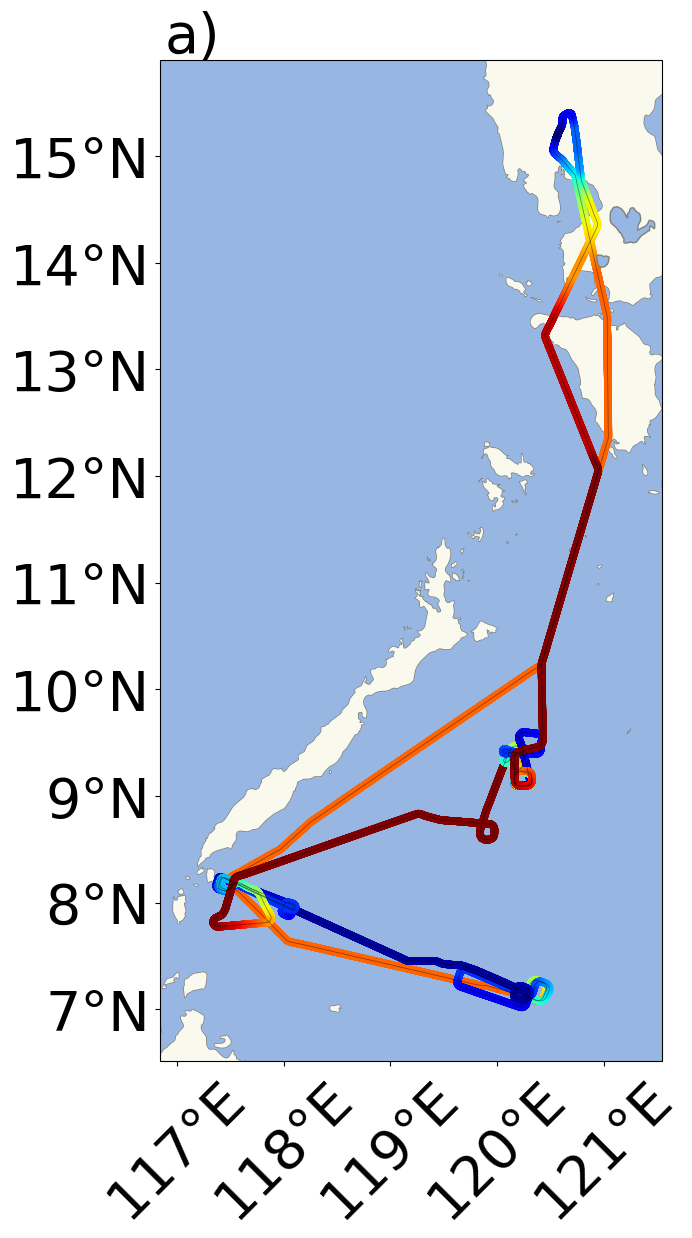

In [28]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np

extent = [ylo, yhi, xlo, xhi]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(13, 13))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

resol = '10m'  # use data at this scale
bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', \
    scale=resol, edgecolor='gray', facecolor=cfeature.COLORS['water'])
rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
    scale=resol, edgecolor='b', facecolor='none')

ax.add_feature(land, facecolor='beige', alpha=0.5, zorder=0)
ax.add_feature(ocean, linewidth=0.2 , zorder=0)
ax.add_feature(lakes)
ax.add_feature(rivers, linewidth=0.5)
ax.add_feature(bodr, linestyle='--', edgecolor='k', alpha=1)

ax.text(0.01, 1.05, 'a)', transform=ax.transAxes, fontsize=40, va='top', ha='left')
ax.plot(p3data['lon'], p3data['lat'], linewidth=0.5, transform=ccrs.PlateCarree(), color='k', alpha=0.5,  label='Flight Track')
#scatterplot
sc = ax.scatter(p3data['lon'], p3data['lat'], c= p3data['alt']/1000, s=20, marker='o', cmap='jet',transform=ccrs.PlateCarree())

lons = p3data['lon'].values
lats = p3data['lat'].values
datetimes = p3data['time'].values
alts = p3data['alt'].values


plot_ticks(ax)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=40)

ax.set_ylim(p3data['lat'].min()-0.5,p3data['lat'].max()+0.5 )
ax.set_xlim(p3data['lon'].min()-0.5,p3data['lon'].max()+0.5 )
plt.savefig(f'img/Figure7_AMSPaper.png',dpi=300, bbox_inches='tight')

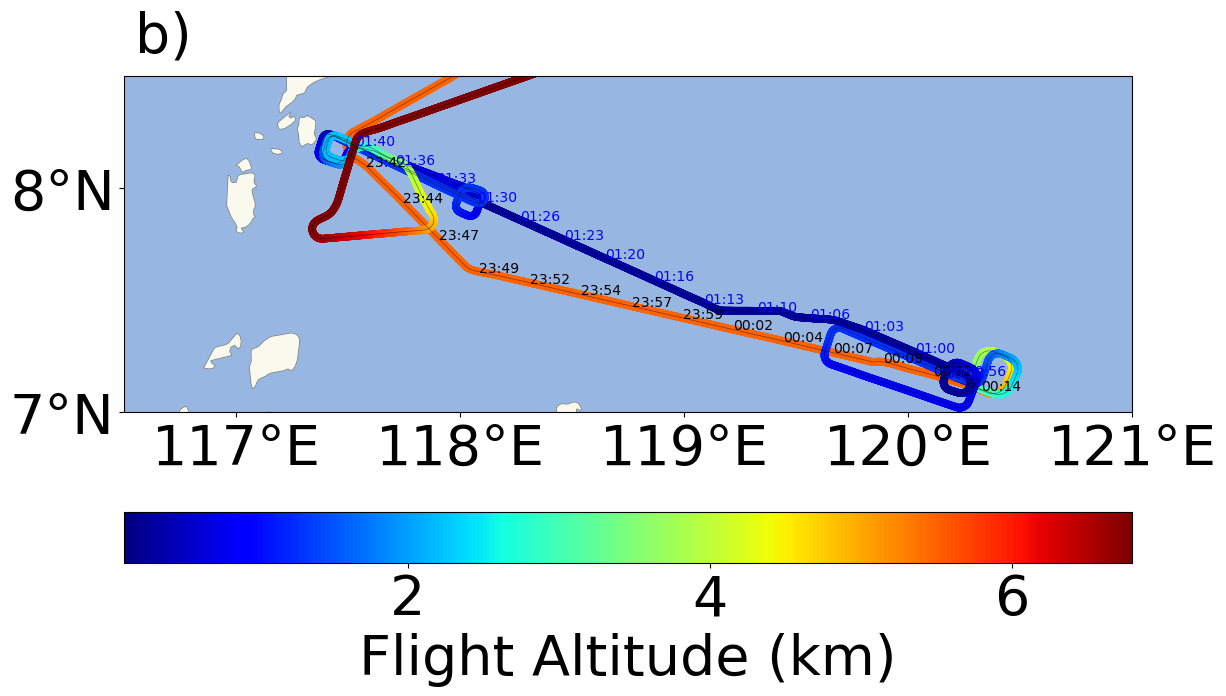

In [31]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np

extent = [ylo, yhi, xlo, xhi]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(13, 13))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

resol = '10m'  # use data at this scale
bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', \
    scale=resol, edgecolor='gray', facecolor=cfeature.COLORS['water'])
rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
    scale=resol, edgecolor='b', facecolor='none')

ax.add_feature(land, facecolor='beige', alpha=0.5, zorder=0)
ax.add_feature(ocean, linewidth=0.2 , zorder=0)
ax.add_feature(lakes)
ax.add_feature(rivers, linewidth=0.5)
ax.add_feature(bodr, linestyle='--', edgecolor='k', alpha=1)

ax.text(0.01, 1.2, 'b)', transform=ax.transAxes, fontsize=40, va='top', ha='left')
ax.plot(p3data['lon'], p3data['lat'], linewidth=0.5, transform=ccrs.PlateCarree(), color='k', alpha=0.5,  label='Flight Track')
#scatterplot
sc = ax.scatter(p3data['lon'], p3data['lat'], c= p3data['alt']/1000, s=20, marker='o', cmap='jet',transform=ccrs.PlateCarree())

lons = p3data['lon'].values
lats = p3data['lat'].values
datetimes = p3data['time'].values
alts = p3data['alt'].values

p3data_ = p3data[(p3data['lon']>116.5) & (p3data['lon']<121) & (p3data['lat']>7) & (p3data['lat']<8.1) & (p3data['alt']> 5400) & (p3data['alt']< 6000)]
lons = p3data_['lon'].values
lats = p3data_['lat'].values
datetimes = p3data_['time'].values
#for i in range(0, len(lons), 500):
for i in range(0, len(lons), 150):
    dt = pd.to_datetime(datetimes[i])  # convert numpy.datetime64 to pandas.Timestamp
    ax.text(lons[i], lats[i], dt.strftime('%H:%M'), fontsize=10, transform=ccrs.PlateCarree())


p3data_ = p3data[(p3data['lon']>116.5) & (p3data['lon']<121) & (p3data['lat']>7) & (p3data['lat']<9)  & (p3data['alt']< 330)]
lons = p3data_['lon'].values
lats = p3data_['lat'].values
datetimes = p3data_['time'].values
#for i in range(0, len(lons), 500):
for i in range(0, len(lons), 200):
    dt = pd.to_datetime(datetimes[i])  # convert numpy.datetime64 to pandas.Timestamp
    ax.text(lons[i], lats[i], dt.strftime('%H:%M'), fontsize=10, color='blue', transform=ccrs.PlateCarree())

plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
# Add colorbar at the bottom
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.1, shrink=1)
cbar.set_label('Flight Altitude (km)', fontsize=40)   # set label font size
cbar.ax.tick_params(labelsize=40)      

plot_ticks(ax)


ax.set_ylim(7, 8.5)
ax.set_xlim(116.5 , 121)
plt.savefig(f'img/Figure7b_AMSPaper.png',dpi=300, bbox_inches='tight')